# Annotation statistics

Script to evaluate annotation statistics, including how many documents were annotated, and within this how many of each named entity was annotated.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to load in json file from LightTag
def load_json_to_df(file):
    
    results = json.load(open(file))
    
    # Create list of only those posts which have been annotated
    annotated = []
    for example in results['examples']:
        if example['annotations'] != []:
            annotated.append(example)
            
    return pd.DataFrame(annotated)

In [3]:
annotations = load_json_to_df('ingredient-tagger_annotations.json')
annotations.head(3)

,content,seen_by,metadata,example_id,annotations,classifications
0,masala paneer \n\nto set the paneer why to use...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 230},6aea61a1-ee55-4aa3-8af9-3ac0a0275b69,"[{'end': 756, 'tag': 'INGREDIENT', 'start': 74...",[]
1,"warm salad of purple sprouting broccoli, new p...","[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 459},5c5cef61-a0d1-4665-b2d1-eb782377aeba,"[{'end': 360, 'tag': 'MEASUREMENT', 'start': 3...",[]
2,if you are looking to bring a yummy pasta sala...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 564},d4773a47-0223-4902-a2d2-97ba6715bf10,"[{'end': 605, 'tag': 'MEASUREMENT', 'start': 5...",[]


## Counting the annotations from each post

In [4]:
def count_annotations(annotations_list):
    
    num_entities = len(annotations_list)
    
    num_INGREDIENT = 0
    num_QUANTITY = 0
    num_MEASUREMENT = 0
    
    for entity in annotations_list:
        if entity['tag'] =='INGREDIENT':
            num_INGREDIENT += 1
        if entity['tag'] =='QUANTITY':
            num_QUANTITY += 1
        if entity['tag'] =='MEASUREMENT':
            num_MEASUREMENT += 1

    if num_entities != num_INGREDIENT + num_QUANTITY + num_MEASUREMENT:
        print('Error: Number of entities does not match.')
        
    return pd.Series([num_entities, num_INGREDIENT, num_MEASUREMENT, num_QUANTITY])

In [5]:
annotations[['entities', 'INGREDIENT', 'MEASUREMENT', 'QUANTITY']] = annotations['annotations'].apply(count_annotations)

In [6]:
annotations

,content,seen_by,metadata,example_id,annotations,classifications,entities,INGREDIENT,MEASUREMENT,QUANTITY
0,masala paneer \n\nto set the paneer why to use...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 230},6aea61a1-ee55-4aa3-8af9-3ac0a0275b69,"[{'end': 756, 'tag': 'INGREDIENT', 'start': 74...",[],30,13,4,13
1,"warm salad of purple sprouting broccoli, new p...","[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 459},5c5cef61-a0d1-4665-b2d1-eb782377aeba,"[{'end': 360, 'tag': 'MEASUREMENT', 'start': 3...",[],64,31,10,23
2,if you are looking to bring a yummy pasta sala...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 564},d4773a47-0223-4902-a2d2-97ba6715bf10,"[{'end': 605, 'tag': 'MEASUREMENT', 'start': 5...",[],68,25,17,26
3,need an easy brunch recipe? this plant-based b...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 592},55b1d911-1eaa-4da1-8ec2-6fd108c277aa,"[{'end': 1045, 'tag': 'INGREDIENT', 'start': 1...",[],31,14,5,12
4,spicy tuna pancake/gochu-chamchi jeon!(고추참치전) ...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 1072},bf01bb9a-5a39-4ef1-84f6-dcfe78b92cf8,"[{'end': 468, 'tag': 'QUANTITY', 'start': 467,...",[],24,9,3,12
5,prawn taco bowl\n\neating keto is simple⁠\n- l...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 1221},9bd8b876-3524-44b2-aed9-326a92c1f56f,"[{'end': 545, 'tag': 'MEASUREMENT', 'start': 5...",[],40,20,7,13
6,• lunch (or dinner) idea •\n\nthe most amazing...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 22},eed4ebba-fb8b-4bbe-9399-8baaab15e0fc,"[{'end': 242, 'tag': 'INGREDIENT', 'start': 23...",[],17,15,0,2
7,this wild rice pilaf recipe creates a side dis...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 339},6bcae729-79dd-4c94-bbf3-fd8ab12f09ae,"[{'end': 324, 'tag': 'MEASUREMENT', 'start': 3...",[],47,26,9,12
8,recipe time!!\n\nboil your lasagna for 5-7 min...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 564},f73de398-8c2d-474b-9d41-80784ce5d21f,"[{'end': 247, 'tag': 'INGREDIENT', 'start': 24...",[],85,47,14,24
9,paneer matar pulao\nsave it to try later\n\nin...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 914},6a92d896-6e12-42ad-bb7a-acd020c9b788,"[{'end': 290, 'tag': 'MEASUREMENT', 'start': 2...",[],49,23,11,15


## Analysis of findings

In [7]:
print(f'num_posts {len(annotations)}')
for col in ['entities', 'INGREDIENT', 'MEASUREMENT', 'QUANTITY']:
    print(col, annotations[col].sum())

num_posts 36
entities 1322
INGREDIENT 648
MEASUREMENT 217
QUANTITY 457


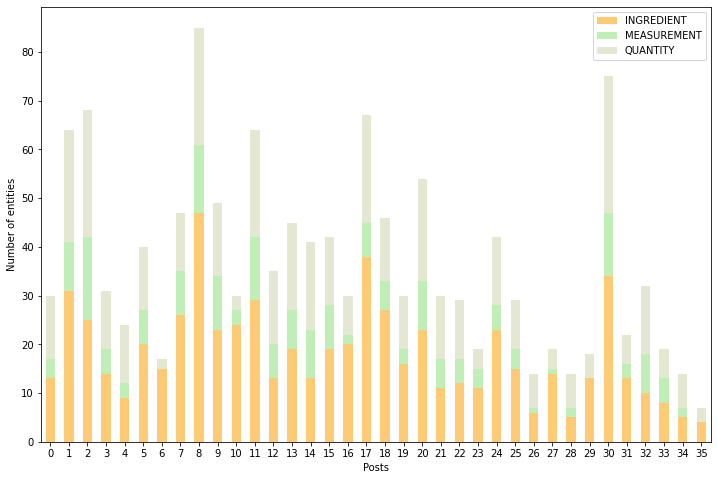

In [25]:
colors = {
    "MEASUREMENT": "#bfeeb7",
    "INGREDIENT": "#feca74",
    "QUANTITY": "#e4e7d2"
}
ax = annotations.plot.bar(y=['INGREDIENT', 'MEASUREMENT', 'QUANTITY'],
                          rot=0,
                          stacked=True,
                          color=colors,
                          figsize=(12,8), xlabel='Posts', ylabel='Number of entities')
plt.show()